In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

In [2]:
from utils import load_and_fillna, pca_prep, run_random_forest

In [3]:
from sklearn.model_selection import train_test_split
def extract_features(df):
    features = list(df.columns[:-1])
    y = df['Target']
    X = df[features]
    return X,y

def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
    return X_train, X_test, y_train, y_test

In [7]:
LUAD_CNV = pd.read_pickle("data/LUAD_CNV.pkl")
LUSC_CNV = pd.read_pickle("data/LUSC_CNV.pkl")

In [13]:
LUAD_CNV.shape


(556, 19729)

In [14]:
LUAD_CNV.describe()

Gene Symbol,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,0.021583,0.023381,0.025180,0.026978,0.028777,0.030576,0.032374,0.034173,0.035971,0.037770,...,35.562950,35.564748,35.566547,35.568345,35.570144,35.571942,35.573741,35.571942,35.573741,35.575540
std,0.364509,0.366862,0.374039,0.385772,0.401662,0.421238,0.444014,0.469523,0.497345,0.527115,...,836.267823,836.310232,836.352642,836.395051,836.437461,836.479870,836.522280,836.564838,836.607247,836.649657
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,19719.000000,19720.000000,19721.000000,19722.000000,19723.000000,19724.000000,19725.000000,19726.000000,19727.000000,19728.000000


In [15]:
LUAD_CNV["Target"] = 1
LUSC_CNV["Target"] = 2
df = pd.concat([LUAD_CNV,LUSC_CNV])

In [16]:
df.head()

,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9,Target
TCGA-69-8253-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-69-8255-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-86-8278-01A,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
TCGA-97-8179-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-83-5908-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold()
df_variance = thresholder.fit_transform(df)
df_variance.shape

(1081, 19730)

In [19]:
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.7788018433179723


In [48]:
principalCompLUAD = pca_prep(LUAD_CNV, 5)
principalCompLUSC = pca_prep(LUSC_CNV, 5)

In [49]:
principalCompLUAD['Target'] = '0'
principalCompLUSC['Target'] = '1'
lungCNV = pd.concat([principalCompLUAD,principalCompLUSC])

In [50]:
lungCNV.head()

,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9,Target
PC-1,-0.000007,0.000817,0.001609,0.002343,0.003002,0.003579,0.004076,0.004498,0.004854,0.005152,...,0.007122,0.007122,0.007122,0.007122,0.007122,0.007122,0.007122,0.007122,0.007122,0
PC-2,-0.272907,-0.271106,-0.265854,-0.257720,-0.247479,-0.235934,-0.223790,-0.211592,-0.199718,-0.188403,...,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444,0.000444,0
PC-3,0.045551,0.045369,0.044606,0.043354,0.041739,0.039895,0.037940,0.035964,0.034034,0.032188,...,0.001037,0.001037,0.001037,0.001037,0.001037,0.001037,0.001020,0.001020,0.001020,0
PC-4,0.015003,0.014794,0.014400,0.013856,0.013205,0.012494,0.011760,0.011034,0.010334,0.009672,...,-0.001091,-0.001091,-0.001091,-0.001091,-0.001091,-0.001091,-0.001055,-0.001055,-0.001055,0
PC-5,0.006609,0.006747,0.006794,0.006758,0.006655,0.006502,0.006318,0.006115,0.005906,0.005697,...,0.001511,0.001511,0.001511,0.001511,0.001511,0.001511,0.001536,0.001536,0.001536,0


In [26]:
X, y = extract_features(lungCNV)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))

SVM Accuracy:  0.5


In [34]:
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")

In [53]:
princCompLUAD = pca_prep(LUAD, 5)
princCompLUSC = pca_prep(LUSC, 5)
princCompLUAD['Target'] = '0'
princCompLUSC['Target'] = '1'
lungGE = pd.concat([princCompLUAD,princCompLUSC])

Training Features Shape: (8, 19729)
Training Labels Shape: (8,)
Testing Features Shape: (2, 19729)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


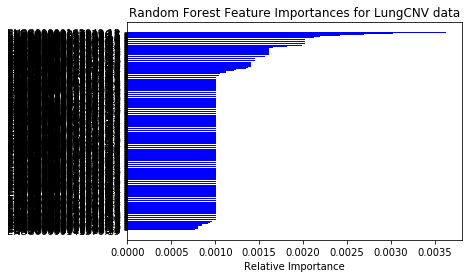

Top 500 features: ['ENSG00000162949.15', 'ENSG00000157916.17', 'ENSG00000270136.4', 'ENSG00000159423.15', 'ENSG00000205090.7', 'ENSG00000088280.17', 'ENSG00000115657.11', 'ENSG00000279244.1', 'ENSG00000118197.12', 'ENSG00000173372.15', 'ENSG00000053372.4', 'ENSG00000169991.9', 'ENSG00000204219.8', 'ENSG00000184163.3', 'ENSG00000117640.16', 'ENSG00000177674.14', 'ENSG00000196581.9', 'ENSG00000048707.12', 'ENSG00000227868.5', 'ENSG00000118960.11', 'ENSG00000187600.11', 'ENSG00000204464.6', 'ENSG00000055070.15', 'ENSG00000068912.12', 'ENSG00000154429.9', 'ENSG00000011523.12', 'ENSG00000138069.15', 'ENSG00000204624.7', 'ENSG00000173436.12', 'ENSG00000214336.4', 'ENSG00000171824.12', 'ENSG00000130255.11', 'ENSG00000237847.2', 'ENSG00000049247.12', 'ENSG00000174792.9', 'ENSG00000197880.7', 'ENSG00000116237.14', 'ENSG00000184908.16', 'ENSG00000255054.3', 'ENSG00000116752.5', 'ENSG00000186510.10', 'ENSG00000078140.12', 'ENSG00000169679.13', 'ENSG00000164574.14', 'ENSG00000125551.17', 'ENSG0000

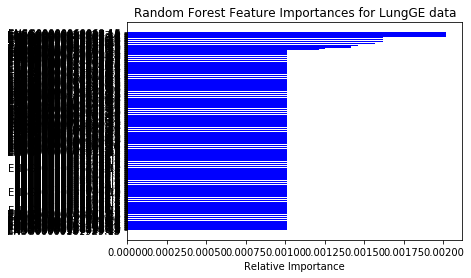

Top 500 features: ['ENSG00000060069.15', 'ENSG00000001497.15', 'ENSG00000011007.11', 'ENSG00000109814.10', 'ENSG00000162377.5', 'ENSG00000022976.14', 'ENSG00000186862.16', 'ENSG00000087460.22', 'ENSG00000006747.13', 'ENSG00000070081.14', 'ENSG00000214248.2', 'ENSG00000242770.2', 'ENSG00000011600.10', 'ENSG00000179520.9', 'ENSG00000032742.16', 'ENSG00000197702.10', 'ENSG00000138399.16', 'ENSG00000163734.4', 'ENSG00000110090.11', 'ENSG00000036473.6', 'ENSG00000006327.12', 'ENSG00000154930.13', 'ENSG00000073605.17', 'ENSG00000042493.14', 'ENSG00000066230.9', 'ENSG00000196289.6', 'ENSG00000108055.9', 'ENSG00000100884.8', 'ENSG00000180447.6', 'ENSG00000076650.5', 'ENSG00000066379.13', 'ENSG00000251884.1', 'ENSG00000082497.10', 'ENSG00000013288.7', 'ENSG00000000003.13', 'ENSG00000011052.20', 'ENSG00000068489.11', 'ENSG00000060339.12', 'ENSG00000059145.17', 'ENSG00000049249.7', 'ENSG00000071462.10', 'ENSG00000000457.12', 'ENSG00000213386.3', 'ENSG00000168992.4', 'ENSG00000269220.1', 'ENSG0000

In [54]:
lungCNV_import = run_random_forest(df=lungCNV, random_state=42, n_estimators=1000, n_importance=500, name="LungCNV")
lungGE_import = run_random_forest(df=lungGE, random_state=42, n_estimators=1000, n_importance=500, name="LungGE")

In [55]:
lungCNV_import[:20]

['ENSG00000162949.15',
 'ENSG00000157916.17',
 'ENSG00000270136.4',
 'ENSG00000159423.15',
 'ENSG00000205090.7',
 'ENSG00000088280.17',
 'ENSG00000115657.11',
 'ENSG00000279244.1',
 'ENSG00000118197.12',
 'ENSG00000173372.15',
 'ENSG00000053372.4',
 'ENSG00000169991.9',
 'ENSG00000204219.8',
 'ENSG00000184163.3',
 'ENSG00000117640.16',
 'ENSG00000177674.14',
 'ENSG00000196581.9',
 'ENSG00000048707.12',
 'ENSG00000227868.5',
 'ENSG00000118960.11']

In [64]:
num_features = [30, 50, 100, 150, 300]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(lungCNV_import[:n]).intersection(set(lungGE_import[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

CNV intersection GE :  {'ENSG00000100099.19', 'ENSG00000049247.12', 'ENSG00000116704.7', 'ENSG00000106331.13'}


Top 200 gave: ENSG00000116704.7, ENSG00000100099.19 Top 300 gave these additions: ENSG00000049247.12, ENSG00000106331.13


Training Features Shape: (8, 19729)
Training Labels Shape: (8,)
Testing Features Shape: (2, 19729)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


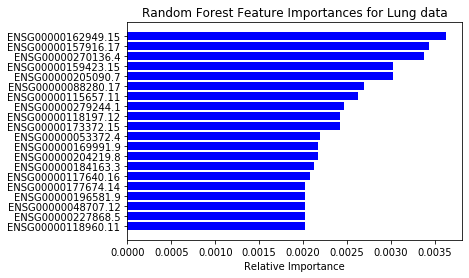

Top 20 features: ['ENSG00000162949.15', 'ENSG00000157916.17', 'ENSG00000270136.4', 'ENSG00000159423.15', 'ENSG00000205090.7', 'ENSG00000088280.17', 'ENSG00000115657.11', 'ENSG00000279244.1', 'ENSG00000118197.12', 'ENSG00000173372.15', 'ENSG00000053372.4', 'ENSG00000169991.9', 'ENSG00000204219.8', 'ENSG00000184163.3', 'ENSG00000117640.16', 'ENSG00000177674.14', 'ENSG00000196581.9', 'ENSG00000048707.12', 'ENSG00000227868.5', 'ENSG00000118960.11']


In [29]:
lungCNV_important = run_random_forest(df=lungCNV, random_state=42, n_estimators=1000, n_importance=20, name="Lung")

In [43]:
lungCNVset = set(lungCNV_important)
print(lungCNVset)

{'ENSG00000177674.14', 'ENSG00000118960.11', 'ENSG00000157916.17', 'ENSG00000118197.12', 'ENSG00000270136.4', 'ENSG00000279244.1', 'ENSG00000205090.7', 'ENSG00000117640.16', 'ENSG00000115657.11', 'ENSG00000159423.15', 'ENSG00000227868.5', 'ENSG00000184163.3', 'ENSG00000173372.15', 'ENSG00000088280.17', 'ENSG00000169991.9', 'ENSG00000204219.8', 'ENSG00000048707.12', 'ENSG00000196581.9', 'ENSG00000162949.15', 'ENSG00000053372.4'}


In [38]:
lung.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,Target
PC-1,-0.001676,-0.000028,-0.001675,-0.001388,-0.000673,-0.000604,-0.000775,-0.000912,-0.000299,-0.000365,...,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0.004068,0
PC-2,-0.149663,-0.018969,-0.167814,-0.170663,-0.163008,-0.078096,-0.096229,-0.170478,-0.097126,-0.187566,...,0.000361,0.000361,0.000361,0.000361,0.000324,0.000310,0.000361,0.000361,0.000317,0
PC-3,0.083602,-0.074727,0.093861,-0.004919,0.239022,-0.296755,-0.115605,0.094663,0.200833,0.094013,...,0.000111,0.000111,0.000111,0.000111,0.000109,0.000115,0.000111,0.000111,0.000125,0
PC-4,0.009539,0.113395,-0.038760,0.226400,0.119222,-0.196224,0.008581,-0.212243,-0.017107,0.096655,...,-0.000083,-0.000083,-0.000083,-0.000083,0.000083,-0.000086,-0.000083,-0.000083,-0.000053,0
PC-5,0.037584,-0.147935,-0.034024,0.038899,-0.126622,-0.120662,-0.183663,-0.013734,-0.094490,-0.076797,...,-0.000011,-0.000011,-0.000011,-0.000011,-0.000042,-0.000009,-0.000011,-0.000011,-0.000017,0


Training Features Shape: (8, 60488)
Training Labels Shape: (8,)
Testing Features Shape: (2, 60488)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


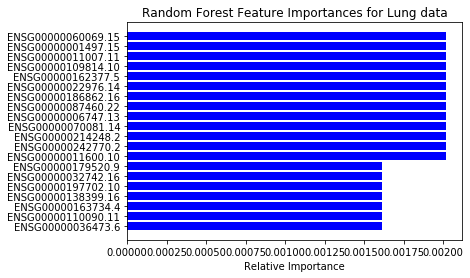

Top 20 features: ['ENSG00000060069.15', 'ENSG00000001497.15', 'ENSG00000011007.11', 'ENSG00000109814.10', 'ENSG00000162377.5', 'ENSG00000022976.14', 'ENSG00000186862.16', 'ENSG00000087460.22', 'ENSG00000006747.13', 'ENSG00000070081.14', 'ENSG00000214248.2', 'ENSG00000242770.2', 'ENSG00000011600.10', 'ENSG00000179520.9', 'ENSG00000032742.16', 'ENSG00000197702.10', 'ENSG00000138399.16', 'ENSG00000163734.4', 'ENSG00000110090.11', 'ENSG00000036473.6']


In [39]:
lung_important = run_random_forest(df=lung, random_state=42, n_estimators=1000, n_importance=20, name="Lung")

In [44]:
lungset = set(lung_important)

In [47]:
print("CNV intersection GE : ", lungCNVset.intersection(lungset))

CNV intersection GE :  set()
